# Notebook for visualizing quiz results (2/17/20)
## third recitation, Intro to Neuroscience Spring 2020

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import numpy as np

### Create pandas dataframe with column names for quiz data

In [23]:
file3 = '/Users/maltegueth/Documents/quiz_scores3.csv'
file2 = '/Users/maltegueth/Documents/quiz_scores2.csv'
file1 = '/Users/maltegueth/Documents/quiz_scores.csv'

columns = ['student', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']
data = pd.read_csv(file1, sep=',', names=columns+['scores'])
data2 = pd.read_csv(file2, sep=',', names=columns+['scores'])
data3 = pd.read_csv(file3, sep=',', names=columns+['scores'])

### The correct key is: c d b c d a or 3 4 2 3 4 1

In [3]:
data3

,student,Q1,Q2,Q3,Q4,Q5,Q6,scores
0,1,A,A,D,A,D,C,1.000
1,2,A,A,D,A,D,C,1.000
2,3,D,C,D,A,D,C,0.667
3,4,A,D,D,A,C,C,0.667
4,5,A,A,D,A,D,B,0.833
5,6,A,A,D,A,D,C,1.000
6,7,A,A,D,A,D,C,1.000
7,8,C,A,D,A,D,C,0.833
8,9,B,A,D,D,A,C,0.500
9,10,A,A,D,A,D,C,1.000


### As a reminder, here are the questions

    Quiz

    2/10
    Neurophysiology

    Please circle the correct answer for each question. You can only pick one option per question.

    Gap junctions are ________
    a) a direct, electrical synaptic connection.
    b) formed by neurotransmitters.
    c) slower than chemical synapses.
    d) a form of chemical synapse.

    Which statement about Ca++ and neurotransmitters is correct:
    a) Synaptic delay refers to the time from the beginning of the presynaptic action potential to the onset of the postsynaptic response.
    b) The synaptic delay is mostly due to the slow diffusion of neurotransmitters across the synaptic cleft.
    c) Presynaptic Ca++ currents can be seen rise simultaneously with the presynaptic action potential.
    d) The molecular shape of a transmitter perfectly fits open holes in the 
    postsynaptic membrane enabling it to just diffuse through the membrane.

    What order of events best describes the release of neurotransmitters at the synapse?
    a) An action potential depolarizes the presynaptic cell, Ca++ channels open, Ca++ rushes in, voltage-gated neurotransmitter channels open. 
    b) Ca++ channels open, Ca++ rushes in, the presynaptic cell is hyperpolarized, synaptic vesicles move to a docking point and merge with the presynaptic membrane.
    c) The presynaptic cell is depolarized, postsynaptic vesicles move to a docking point and merge with the postsynaptic membrane via exocytosis.
    d) The presynaptic cell is depolarized, Ca++ channels open, Ca++ 
    rushes in, synaptic vesicles move to a docking point and merge with the 
    presynaptic membrane, releasing neurotransmitters via exocytosis.

    Endocytosis serves to ________ neurotransmitters.
    a) recycle.
    b) dissolve.
    c) degrade.
    d) activate.


    Which of the following statements about postsynaptic potentials is false:
    a) EPSPs make the postsynaptic cell more likely to fire, while IPSPs make it less likely to fire.
    b) EPSPs and IPSPs can summate.
    c) EPSPs are linked to K+ and Na+, while IPSPs to Cl- and K+.
    d) Postsynaptic potentials happen faster than action potentials to enable 
    temporal summation.

    Postsynaptic potentials ...
    a) … trigger action potentials at the presynaptic cell.
    b) … can only cancel each other out but not summate.
    c) … below threshold (subthreshold) can add up to reach threshold if they occur close enough to one another.
    d) … EPSPs involve a hyperpolarization, while IPSPs are connected to a 
    depolarization.


### Calculate the scores and convert them to percentages

In [54]:
key = [3, 4, 2, 3, 4, 1]
corrects = pd.DataFrame(0, index=np.arange(len(data2)), columns=['score'])

for student in range(0,len(data2.index)):
    corrects.loc[student,:] = len([i for i, j in zip(key, data2.loc[student, "Q1":"Q6"]) if i == j])


data2.insert(7, "score", corrects['score'], True)
data2.insert(8, "score_percent", corrects['score']/6, True)

data2

,student,Q1,Q2,Q3,Q4,Q5,Q6,score,score_percent,scores
0,1,1,4,2,3,4,1,5,0.833333,NaN
1,2,1,4,2,4,4,3,3,0.500000,NaN
2,3,1,4,2,3,4,3,4,0.666667,NaN
3,4,1,4,2,3,2,3,3,0.500000,NaN
4,5,2,4,2,1,4,1,4,0.666667,NaN
5,6,1,4,2,3,4,1,5,0.833333,NaN
6,7,1,4,2,3,2,4,3,0.500000,NaN
7,8,2,1,3,3,2,1,2,0.333333,NaN
8,9,1,3,1,1,4,3,1,0.166667,NaN
9,10,3,2,2,1,4,1,4,0.666667,NaN


In [51]:
data2

,student,Q1,Q2,Q3,Q4,Q5,Q6,score,score_percent,scores
0,1,1,4,2,3,4,1,5,0.833333,NaN
1,2,1,4,2,4,4,3,3,0.500000,NaN
2,3,1,4,2,3,4,3,4,0.666667,NaN
3,4,1,4,2,3,2,3,3,0.500000,NaN
4,5,2,4,2,1,4,1,4,0.666667,NaN
5,6,1,4,2,3,4,1,5,0.833333,NaN
6,7,1,4,2,3,2,4,3,0.500000,NaN
7,8,2,1,3,3,2,1,2,0.333333,NaN
8,9,1,3,1,1,4,3,1,0.166667,NaN
9,10,3,2,2,1,4,1,4,0.666667,NaN


In [55]:
dataFrame1 = pd.DataFrame(1, index=np.arange(len(data)), columns=['quiz'])
dataFrame2 = pd.DataFrame(2, index=np.arange(len(data)), columns=['quiz'])
dataFrame3 = pd.DataFrame(3, index=np.arange(len(data)), columns=['quiz'])

data.insert(8, "quiz", dataFrame1, True)
data2.insert(8, "quiz", dataFrame2, True)
data3.insert(8, "quiz", dataFrame3, True)

data2=data2.drop(['score'], axis=1)
data2=data2.drop(['score_percent'], axis=1)

#data=data.rename(columns={"score": "scores"}, errors="raise")

In [56]:
all_data = pd.concat([data, data2, data3])
all_data

/Users/maltegueth/anaconda3/envs/mne/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Q1,Q2,Q3,Q4,Q5,Q6,quiz,scores,student
0,4,1,3,1,1,1,1.0,0.830,1
1,4,1,3,1,1,4,1.0,1.000,2
2,4,1,3,1,1,4,1.0,1.000,3
3,4,1,3,1,1,4,1.0,1.000,4
4,4,4,3,1,1,4,1.0,0.670,5
5,3,1,3,1,1,4,1.0,0.830,6
6,4,1,3,1,1,4,1.0,1.000,7
7,4,1,3,1,1,4,1.0,1.000,8
8,4,1,3,1,1,4,1.0,1.000,9
9,1,1,3,1,1,4,1.0,0.830,10


## Here are some basic stats from the dataframe (mean, median, sd)

In [4]:
data3.scores.mean()

0.8332631578947368

In [5]:
data3.scores.median()

0.833

In [6]:
data3.scores.std()

0.21221708469962272

## Next, check some distributional plots to visualize how the class as a whole scored

In [6]:
font = {'family' : 'Sans',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

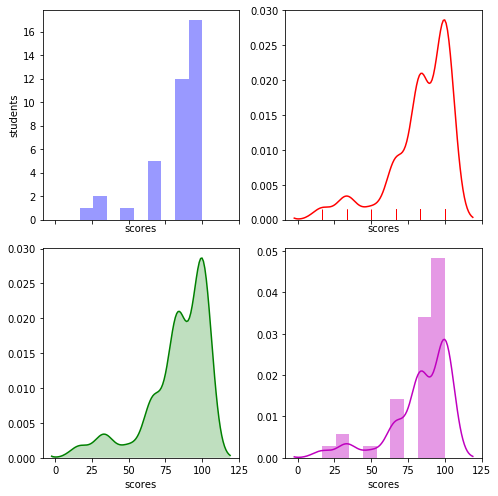

In [9]:
fig1, axes = matplotlib.pyplot.subplots(2, 2, figsize=(7, 7), sharex=True)

ax = sns.distplot(data3['scores']*100, kde=False, color="b", ax=axes[0,0])
sns.distplot(data3['scores']*100, hist=False, rug=True, color="r", ax=axes[0, 1])
sns.distplot(data3['scores']*100, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])
sns.distplot(data3['scores']*100, color="m", ax=axes[1, 1])

ax.set(ylabel='students')
matplotlib.pyplot.tight_layout()

### Below are distributional plots for single questions and student answers

In [24]:
mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'AD': 0}

data3 = data3.replace({'Q1': mapping, 'Q2': mapping, 'Q3': mapping, 'Q4': mapping, 'Q5': mapping, 'Q6': mapping})

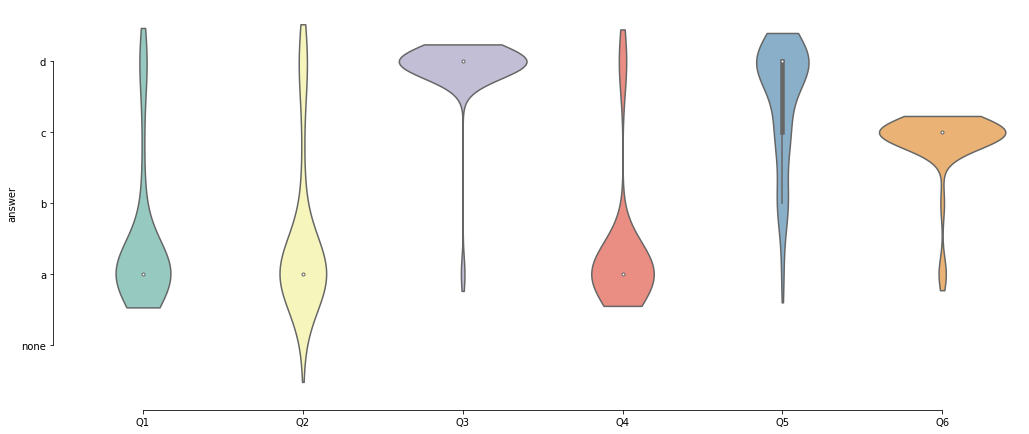

In [25]:
fig2, axes = matplotlib.pyplot.subplots(figsize=(14, 6), sharex=True)

ax = sns.violinplot(data=data3.loc[:, "Q1":"Q6"], palette="Set3", cut=1)

ax.set(ylabel='answer')
ax.set(yticklabels=['none','a', 'b', 'c', 'd'])
matplotlib.pyplot.tight_layout()
sns.despine(offset=10, trim=True)

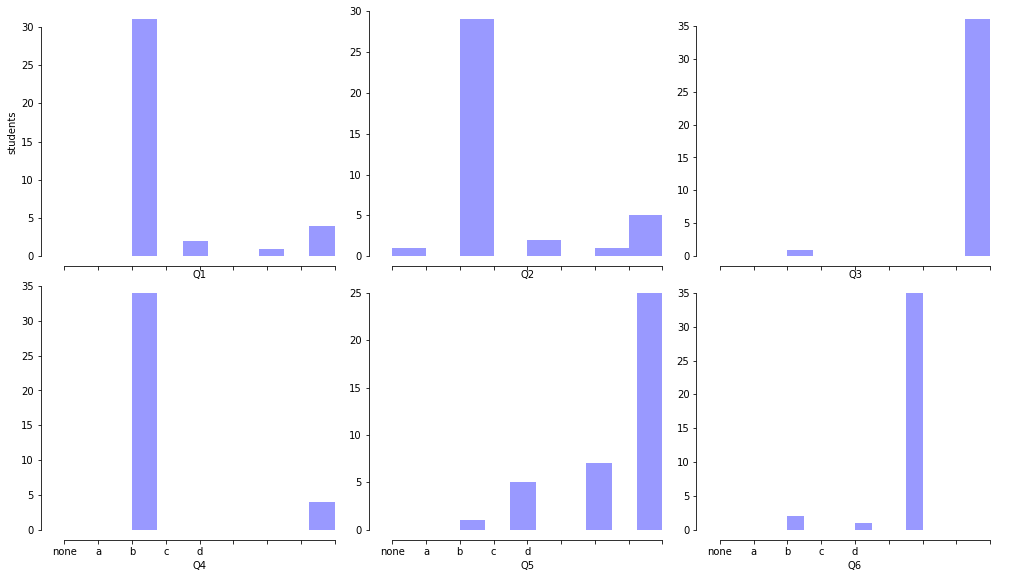

In [27]:
fig3, axes = matplotlib.pyplot.subplots(2, 3, figsize=(14, 8), sharex=True)

ax=sns.distplot(data3['Q1'], hist=True, bins=8, kde=False, norm_hist=False, color="b", ax=axes[0,0])
sns.distplot(data3['Q2'], hist=True, bins=8, kde=False, norm_hist=False, color="b", ax=axes[0,1])

sns.distplot(data3['Q3'], hist=True, bins=8, kde=False, norm_hist=False, color="b", ax=axes[0,2])
sns.distplot(data3['Q4'], hist=True, bins=8, kde=False, norm_hist=False, color="b", ax=axes[1,0])

sns.distplot(data3['Q5'], hist=True, bins=8, kde=False, norm_hist=False, color="b", ax=axes[1,1])
sns.distplot(data3['Q6'], hist=True, bins=8, kde=False, norm_hist=False, color="b", ax=axes[1,2])

ax.set(ylabel='students')
ax.set(xticklabels=['none','a', 'b', 'c', 'd'])
matplotlib.pyplot.tight_layout()
sns.despine(offset=10, trim=True)

ValueError: Invalid RGBA argument: masked

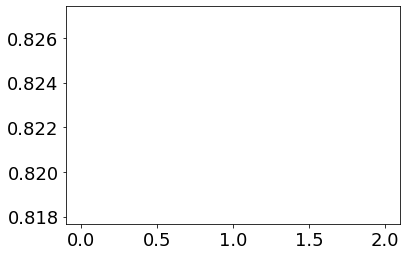

In [57]:
ax = sns.pointplot(x="quiz", y="scores", ci=None, estimator=np.mean, data=all_data, color='b')
sns.pointplot(x="quiz", y="scores",  ci=None, estimator=np.median, data=all_data, ax=ax, color='r')
ax.set(ylabel='score [percent]')
#ax.set(xticks=np.arange(3))
#matplotlib.pyplot.xlim(1, 2)
ax.legend(['Mean', 'Median'])
ax.set(xticklabels=['1','2', '3'])
matplotlib.pyplot.tight_layout()
#sns.despine(offset=10, trim=True)

In [58]:
all_data

,Q1,Q2,Q3,Q4,Q5,Q6,quiz,scores,student
0,4,1,3,1,1,1,1.0,0.830,1
1,4,1,3,1,1,4,1.0,1.000,2
2,4,1,3,1,1,4,1.0,1.000,3
3,4,1,3,1,1,4,1.0,1.000,4
4,4,4,3,1,1,4,1.0,0.670,5
5,3,1,3,1,1,4,1.0,0.830,6
6,4,1,3,1,1,4,1.0,1.000,7
7,4,1,3,1,1,4,1.0,1.000,8
8,4,1,3,1,1,4,1.0,1.000,9
9,1,1,3,1,1,4,1.0,0.830,10
